In [13]:
!unzip -q "/content/sample_data/Copy of devnagari digit.zip" -d "/content/sample_data"

In [14]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


In [15]:
import numpy as np
# Simple function f(x) = x^2
def f(x):
  return x ** 2
# Manual derivative (f'(x) = 2x)
def gradient(x):
  return 2 * x
# Update rule: x = x - learning_rate * gradient
x = 5.0
learning_rate = 0.1
for _ in range(10): # Manually optimize for 10 steps
  x -= learning_rate * gradient(x)
print(f"x: {x}, f(x): {f(x)}")

x: 0.5368709120000001, f(x): 0.2882303761517119


In [16]:
import tensorflow as tf
x = tf.Variable(5.0) # Trainable variable
with tf.GradientTape() as tape:
  y = x ** 2 # y = x^2
grad = tape.gradient(y, x) # Computes dy/dx automatically
print(grad.numpy()) # Output: 10.0

10.0


In [17]:
import numpy as np
import tensorflow as tf
import time
# Create large random matrices
size = (1000, 1000)
A = np.random.rand(*size)
B = np.random.rand(*size)
# NumPy Multiplication
start = time.time()
C_numpy = np.dot(A, B)
print("NumPy Time:", time.time() - start)
# TensorFlow Multiplication (for colab uses GPU Runtime if available)
A_tf = tf.constant(A)
B_tf = tf.constant(B)
start = time.time()
C_tf = tf.matmul(A_tf, B_tf)
print("TensorFlow Time:", time.time() - start)

NumPy Time: 0.05987429618835449
TensorFlow Time: 0.13206958770751953


In [18]:
from tensorflow.keras.layers import Dense
layer = Dense(64, activation='sigmoid')

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


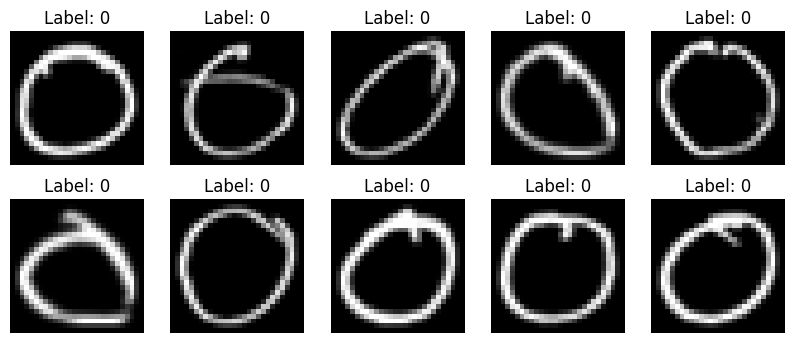

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

# Constants
IMG_HEIGHT, IMG_WIDTH = 28, 28
TRAIN_DIR = "/content/sample_data/DevanagariHandwrittenDigitDataset/Train"
TEST_DIR = "/content/sample_data/DevanagariHandwrittenDigitDataset/Test"


def load_images(folder):
    """Loads images and labels from a given directory."""
    images, labels = [], []
    class_names = sorted(os.listdir(folder))
    class_map = {name: i for i, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path).convert("L")  # Grayscale
            img = img.resize((IMG_WIDTH, IMG_HEIGHT))
            images.append(np.array(img) / 255.0)  # Normalize
            labels.append(label)
    
    return np.array(images), np.array(labels)


def preprocess_data(x, y):
    """Reshapes and one-hot encodes the dataset."""
    x = x.reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1)
    y = to_categorical(y, num_classes=10)
    return x, y


def visualize_samples(x, y, num_samples=10):
    """Displays sample images from the dataset."""
    plt.figure(figsize=(10, 4))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i].reshape(IMG_HEIGHT, IMG_WIDTH), cmap='gray')
        plt.title(f"Label: {np.argmax(y[i])}")
        plt.axis("off")
    plt.show()


# Load datasets
x_train, y_train = load_images(TRAIN_DIR)
x_test, y_test = load_images(TEST_DIR)

# Preprocess datasets
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize sample images
visualize_samples(x_train, y_train)

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the images to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
# One-hot encode the labels (0-9) for classification
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [31]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
        keras.layers.Dense(64, activation="sigmoid"),
        keras.layers.Dense(128, activation="sigmoid"),
        keras.layers.Dense(256, activation="sigmoid"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
optimizer="sgd", # Stochastic Gradient Descent
loss="categorical_crossentropy", # Loss function for multi-class classification
metrics=["accuracy"] # Track accuracy during training
)

In [42]:
batch_size = 128
epochs = 2000
# Callbacks
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.15,
callbacks=callbacks,
)


Epoch 1/2000


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 784), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (None, 784)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 784), dtype=float32)
  • training=True
  • mask=None